# Dimensionality Reduction using an Autoencoder
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
colors = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [28]:
X, y = make_blobs(n_samples    = 20000,
                  n_features   = 50,
                  centers      = 20,
                  cluster_std  = 0.2,
                  center_box   = (-1.0, 1.0),
                  random_state = 17)

In [29]:
display(X.shape)
display(y.shape)

(20000, 50)

(20000,)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.1,
                                                    random_state = 17)

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

In [74]:
pca = PCA(n_components = 2)

pca.fit(X_train)
X_test_pca = pca.transform(X_test)

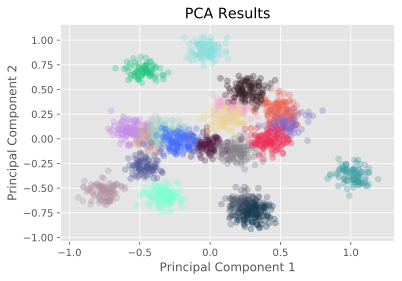

In [75]:
unique_labels = np.unique(y_test)

for index, label in enumerate(unique_labels):
    X_data = X_test_pca[y_test==label]
    
    plt.scatter(X_data[:,0], X_data[:,1], alpha=0.3, c=colors[index])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('PCA Results')
plt.show()

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training
![title](Images/ae_viz.pdf)

https://blog.keras.io/building-autoencoders-in-keras.html

In [202]:
autoencoder = MLPRegressor(hidden_layer_sizes=(50,100,75,50,2,50,75,100,50),
                           alpha=1e-15,
                           max_iter=25000,
                           random_state=None)

autoencoder.fit(X_train, X_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 75, 50, 2, 50, 75, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=25000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [203]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [204]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 75)
(75, 50)
(50, 2)
(2, 50)
(50, 75)
(75, 100)
(100, 50)
(50, 50)


In [205]:
encoder_weights = W[0:5]
encoder_biases = biases[0:5]

In [176]:
def encode(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w,b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0, res_ae@w+b)
            
    return res_ae

In [206]:
res_AE = encode(encoder_weights, encoder_biases, X_test) # (2000, 2)

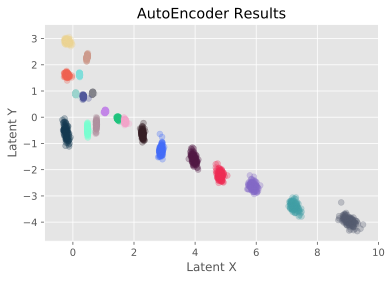

In [49]:
# unique_labels = np.unique(y_test)

for index, label in enumerate(unique_labels):
    latent_space = res_AE[y_test==label]
    
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=colors[index])
    
plt.xlabel("Latent X")
plt.ylabel("Latent Y")
plt.title('AutoEncoder Results')
plt.show()

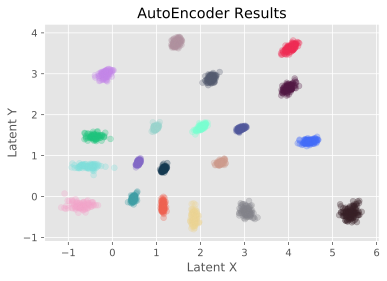

In [207]:
# unique_labels = np.unique(y_test)

for index, label in enumerate(unique_labels):
    latent_space = res_AE[y_test==label]
    
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=colors[index])
    
plt.xlabel("Latent X")
plt.ylabel("Latent Y")
plt.title('AutoEncoder Results')
plt.show()

In [50]:
silhouette_score(X_test, y_test)

0.6106327445141103

In [51]:
silhouette_score(X_test_pca, y_test)

0.3644502030540576

In [52]:
silhouette_score(res_AE, y_test)

0.8020960810528441

In [208]:
silhouette_score(res_AE, y_test)

0.8711429387373778

## Let's build the simplest possible autoencoder

We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [1]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)